In [1]:
# Project : TWitter US Airline Sentiment - Problem Statement

https://olympus.mygreatlearning.com/courses/40613/assignments/123613?module_item_id=1143417

# Data Description
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service")

# Steps 
- Import the necessary libraries
- Get the data
- Explore the data
- Do feature engineering (create relevant columns based on existing columns)
- Plot the wordcloud based on the relevant column
- Do pre-processing
- Noise removal (Special character, html tags, numbers, stopword removal)
- Lowercasing
- Stemming / lemmatization
- Text to number: Vectorization
- CountVectorizer
- TfidfVectorizer
- Build Machine Learning Model for Text Classification.
- Optimize the parameter
- Plot the worldcloud based on the most important features
- Check the performance of the model
- Summary

# Load default libraries

In [2]:
pip install emoji --upgrade

     |████████████████████████████████| 174 kB 7.6 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=ffe416eff701acdc819c69d7179bc4cbc4766ae2e36675032a738d6d5a269306
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [3]:
!pip install contractions

     |████████████████████████████████| 284 kB 6.9 MB/s 
     |████████████████████████████████| 321 kB 78.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85452 sha256=87630e93f2ebf25eee11801734222de6ab32fe9b66b679df501bebeca153db3d
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [5]:
# Standard libraries as per MLS2 Session https://olympus.mygreatlearning.com/courses/40613/files/4345649?module_item_id=2089508
import re, string, unicodedata                          
import contractions                                     
from bs4 import BeautifulSoup                           

import os
import re
import nltk
nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

import gensim
import numpy as np 
import pandas as pd 
pd.set_option('display.max_colwidth', -1)
from time import time
import string
import emoji
from pprint import pprint
import collections

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report 
#from sklearn.externals import joblib
import joblib


### Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 

#ensemble models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


## Getting a feel of the data

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/intro_natural_learning/project/Tweets.csv')

In [7]:
len(df)

14640

In [8]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [9]:
df.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [10]:
# Check shape of DF and check for NULL values
print("Shape of DF ",df.shape)
print("Count of nulls in cols \n", df.isna().sum())

Shape of DF  (14640, 15)
Count of nulls in cols 
 tweet_id                        0    
airline_sentiment               0    
airline_sentiment_confidence    0    
negativereason                  5462 
negativereason_confidence       4118 
airline                         0    
airline_sentiment_gold          14600
name                            0    
negativereason_gold             14608
retweet_count                   0    
text                            0    
tweet_coord                     13621
tweet_created                   0    
tweet_location                  4733 
user_timezone                   4820 
dtype: int64


In [11]:
print("% null/ na values in df")
print("======================")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(1)

% null/ na values in df


tweet_id                        0.0 
airline_sentiment               0.0 
airline_sentiment_confidence    0.0 
negativereason                  37.3
negativereason_confidence       28.1
airline                         0.0 
airline_sentiment_gold          99.7
name                            0.0 
negativereason_gold             99.8
retweet_count                   0.0 
text                            0.0 
tweet_coord                     93.0
tweet_created                   0.0 
tweet_location                  32.3
user_timezone                   32.9
dtype: float64

## Conclusions 
- tweet_coord, airline_sentiment, negative_reasons have > 90% missind data. Need to delete them as they will skew analysis

In [12]:
# Delete cols with > 90% missing daaa
del df['tweet_coord']
del df['airline_sentiment_gold']
del df['negativereason_gold']
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials to the experience... tacky.,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing about it,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
# EDA

Text(0.5, 1.0, 'Count of Type of Sentiment')

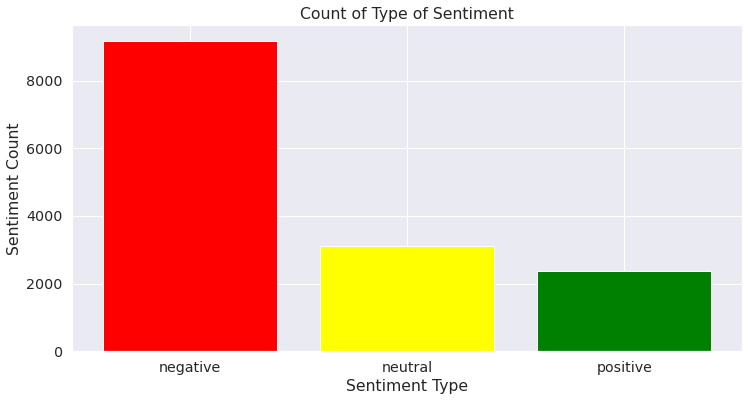

In [14]:
# Bar chart of Sentimenent count
counter = df.airline_sentiment.value_counts()
index = [1,2,3]
plt.figure(1,figsize=(12,6))
plt.bar(index,counter,color=['red','yellow','green'])
plt.xticks(index,['negative','neutral','positive'],rotation=0)
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('Count of Type of Sentiment')

## Observations
- A lot of customers have -ve flight experiences. Need to deep dive on this for the company

            Percent Negative
American    0.710402        
Delta       0.429793        
Southwest   0.490083        
US Airways  0.776862        
United      0.688906        
Virgin      0.359127        


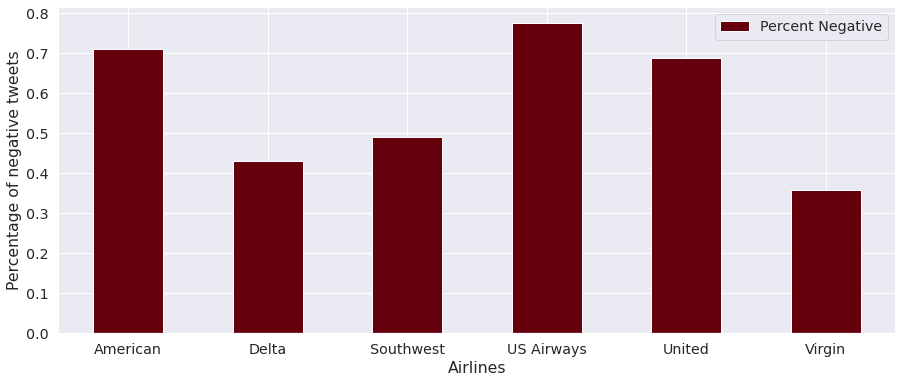

In [15]:
# Display perc plots to see the airlines sentiment feedback

neg_tweets = df.groupby(['airline','airline_sentiment']).count().iloc[:,0]
total_tweets = df.groupby(['airline'])['airline_sentiment'].count()

my_dict = {'American':neg_tweets[0] / total_tweets[0],'Delta':neg_tweets[3] / total_tweets[1],'Southwest': neg_tweets[6] / total_tweets[2],
'US Airways': neg_tweets[9] / total_tweets[3],'United': neg_tweets[12] / total_tweets[4],'Virgin': neg_tweets[15] / total_tweets[5]}
perc = pd.DataFrame.from_dict(my_dict, orient = 'index')
perc.columns = ['Percent Negative']
print(perc)
ax = perc.plot(kind = 'bar', rot=0, colormap = 'Reds_r', figsize = (15,6))
ax.set_xlabel('Airlines')
ax.set_ylabel('Percentage of negative tweets')
plt.show()

## Observations
- US Airways, America, United are perceived to have bad feedback

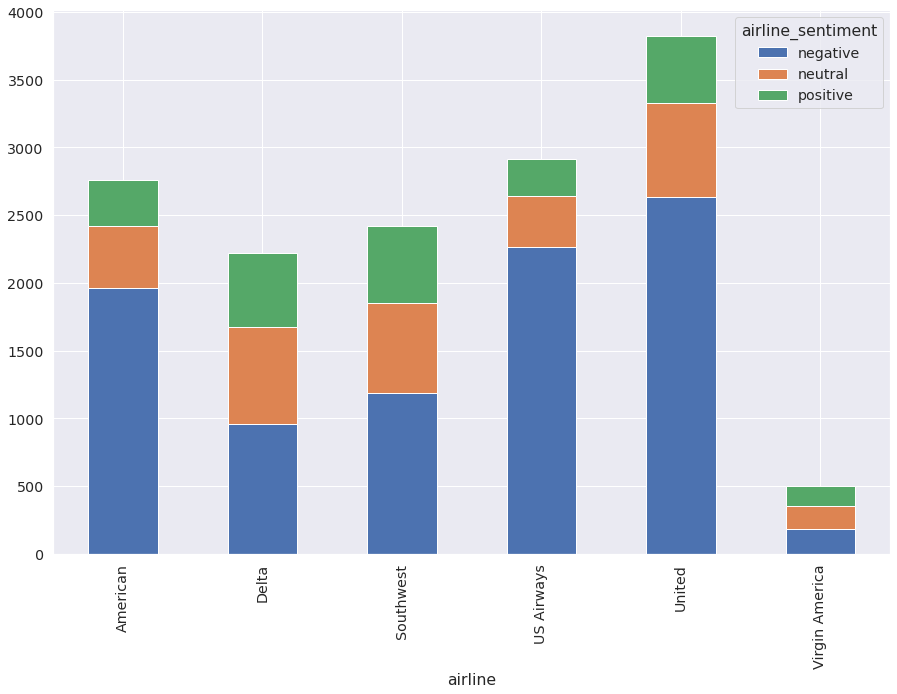

In [16]:
# Check for each airline the break down of sentiments
f = df.groupby(['airline', 'airline_sentiment']).size()
f.unstack().plot(kind='bar', stacked=True, figsize=(15,10))


In [17]:
print(f)

airline         airline_sentiment
American        negative             1960
                neutral              463 
                positive             336 
Delta           negative             955 
                neutral              723 
                positive             544 
Southwest       negative             1186
                neutral              664 
                positive             570 
US Airways      negative             2263
                neutral              381 
                positive             269 
United          negative             2633
                neutral              697 
                positive             492 
Virgin America  negative             181 
                neutral              171 
                positive             152 
dtype: int64


# Most used words in +/- tweeks

In [18]:
from wordcloud import WordCloud,STOPWORDS

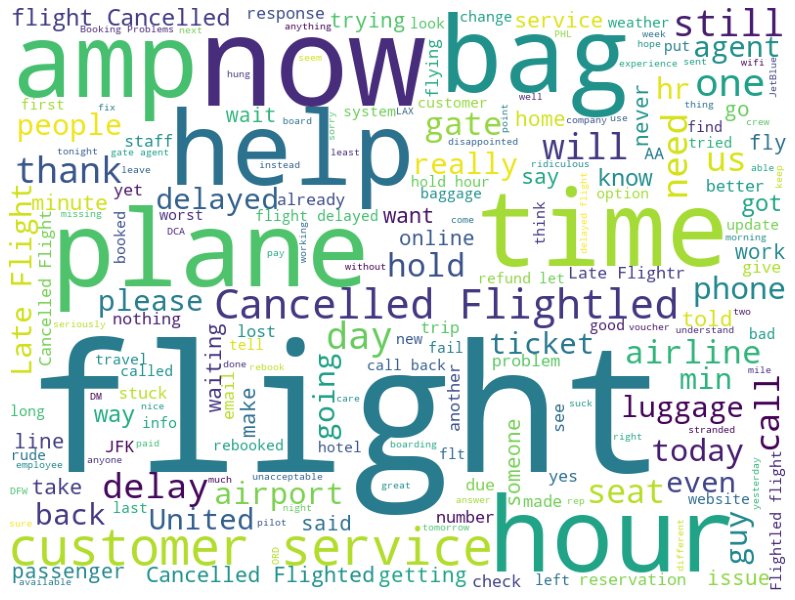

In [21]:
# WC for --ve tweets
df_copy=df[df['airline_sentiment']=='negative']
words = ' '.join(df_copy['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=600
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

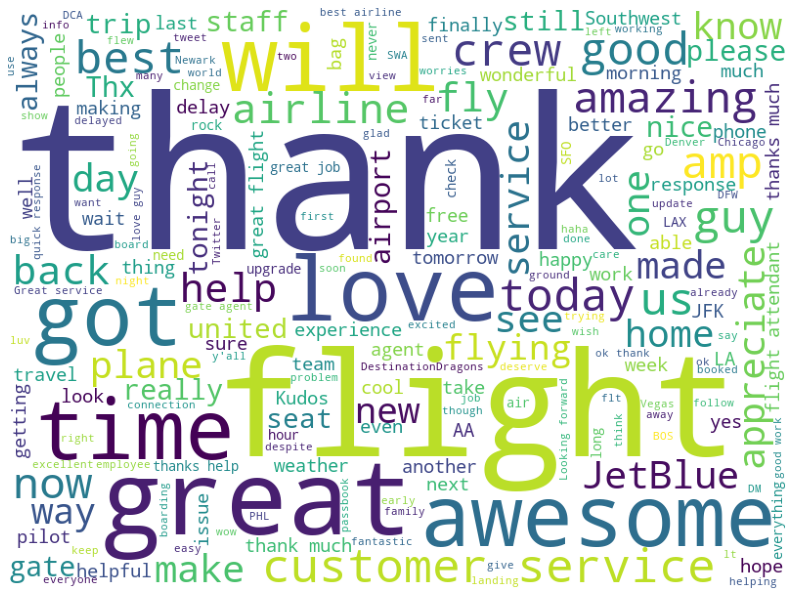

In [22]:
# WC for +ve tweets
df_copy=df[df['airline_sentiment']=='positive']
words = ' '.join(df_copy['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=600
                     ).generate(cleaned_word)
plt.figure(1,figsize=(14, 11))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

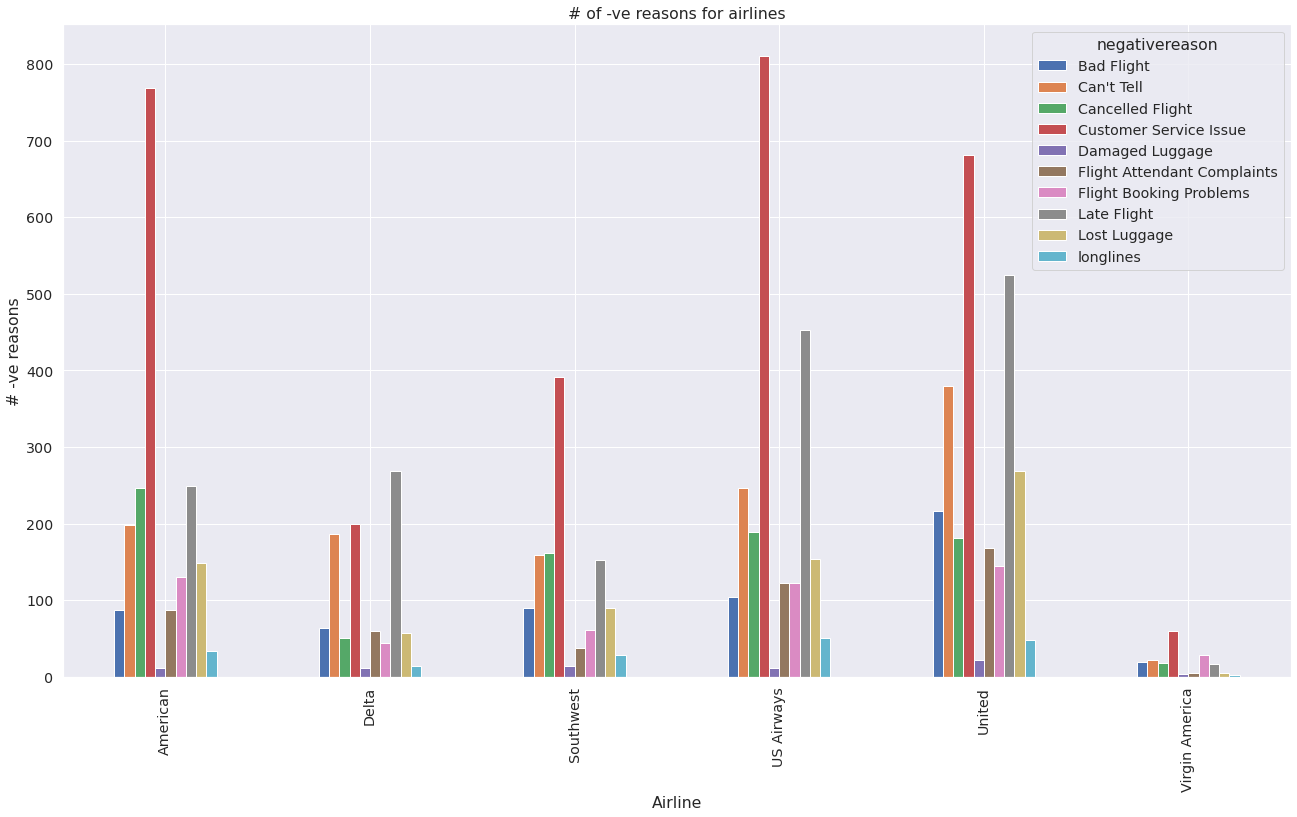

In [23]:
# Plot to deep dive on -ve reason tweets
negative_reasons = df.groupby('airline')['negativereason'].value_counts(ascending=True)
negative_reasons.groupby(['airline','negativereason']).sum().unstack().plot(kind='bar',figsize=(22,12))
plt.xlabel('Airline')
plt.ylabel('# -ve reasons')
plt.title("# of -ve reasons for airlines")
plt.show()

## Observations
- Customer service is the biggest issue

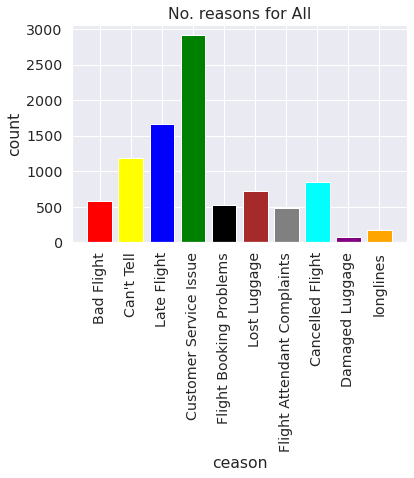

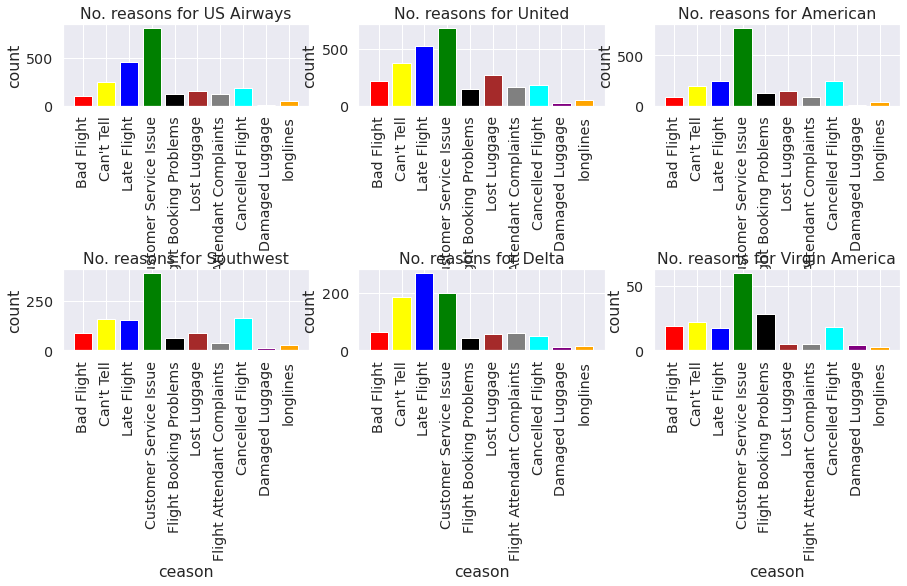

In [28]:
#get the number of negative reasons
df['negativereason'].nunique()

neg_count=dict(df['negativereason'].value_counts(sort=False))
def neg_count(airline):
    if airline=='All':
        a=df
    else:
        a=df[df['airline']==airline]
    count=dict(a['negativereason'].value_counts())
    Unique_reason=list(df['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    
    a=neg_count(airline)
    count=a['count']
    Index = range(1,(len(a)+1))
    plt.bar(Index,count, color=['red','yellow','blue','green','black','brown','gray','cyan','purple','orange'])
    plt.xticks(Index,a['Reasons'],rotation=90)
    plt.ylabel('count')
    plt.xlabel('ceason')
    plt.title('No. reasons for '+ airline)
    
plot_reason('All')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(2,figsize=(15, 15))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(4,3,indices+1)
    plt.subplots_adjust(hspace=2)
    plot_reason(i)

## Observations
- Customer service biggest issue for the airliens with worse sentiment
- Delta is late flight

# Pre-processing of text 

In [29]:
df.head()
df = df.loc[:, ['text', 'airline_sentiment']]

In [30]:
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/intro_natural_learning/project/Tweets.csv')
#df = df.reindex(np.random.permutation(df.index)) 
#df.drop('tweet_id',inplace=True,axis=1)
#df.reset_index(inplace=True)
df = df[['text', 'airline_sentiment']]
df.sample(10)

,text,airline_sentiment
13907,@AmericanAir instead of putting the burden on your customers do the right thing and get more gate agents.,negative
2378,@united correct? What's correct? Sorry I'm lost,neutral
9904,@usairways @AmericanAir LAX connect from term 6 to term 4. 55min layover due to delay. US755-AA2595. Is this realistic? Can 2595 be held?,negative
8886,@JetBlue @KyleJudah new stroller. The travel credit doesn't help cover the cost of a new stroller. Your crew ruined it and therefore should,negative
9980,@USAirways @united each says the other has my luggage. On hold almost 3.5 hrs with @USAirways. @united hung up 3x. http://t.co/dr5oCtp1DY,negative
7355,@JetBlue Update please on why flight 2601 continues to be further delayed,negative
4169,@united Thanks for the timely service &amp; great staff getting my wife and me to and from Cancun this past week for our honeymoon.,positive
6758,@JetBlue but by Cancelled Flighting my flight and pushing me to the next day I'd lose $150 hotel which was why I was trying to get a same-day flight.,negative
7950,@JetBlue thanks for making me miss an important dinner tonight. 2 hr delay and now 20 min on Tarmac... #worst,negative
9045,@USAirways so I can make a reservation,neutral


In [31]:
## Check shape after drop
print("shape:",df.shape)
print("number of nulls in each column:", df.isna().sum())
df.head(5)

shape: (14640, 2)
number of nulls in each column: text                 0
airline_sentiment    0
dtype: int64


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [32]:
print("% of na/nukk in df")
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(1)

% of na/nukk in df


text                 0.0
airline_sentiment    0.0
dtype: float64

## Conclusion
- Clean data no null

#Text preprocessing - Remove stopwords, mentions

In [33]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

df['text'] = df['text'].apply(lambda x: strip_html(x))
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


#Text preprocessing - Replace contractions

In [34]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

df['text'] = df['text'].apply(lambda x: replace_contractions(x))
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


# Text processing - remove the **numbers**

In [35]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

df['text'] = df['text'].apply(lambda x: remove_numbers(x))
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


# Text processing - Tokenization

In [36]:
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
df.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


# Text Processing - list of stop words


In [37]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [38]:
# Helper functions
#  - remove special chars, lemmatize etc
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica not today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face little recourse,negative
4,virginamerica really big bad thing,negative


# More data cleaning / preprocessing - remmoving more stops, mentions, convert all strings to lower case etc.

In [39]:
from nltk.corpus import stopwords

In [40]:
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    #some words might give us something important for the sentiment analysis like not, so we keep them
    wl = ["not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in wl) and len(word) > 1] 
    return " ".join(clean_words)

def remove_mentions(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'@\w+', '', input_text[i])
    return input_text

def lower_case(input_text):
    for i in range(len(input_text)):
        input_text[i] = input_text[i].lower()
    return input_text

def remove_http(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'http\S+', '',input_text[i])
    return input_text

def remove_punctuation(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'[^\w\s]','',input_text[i])
    return input_text

In [41]:
# Map sentiment to numbers - a bit messy code - got it from stakoverflow
data_2 = df[['text', 'airline_sentiment']]
preprocessed_data = data_2.apply(remove_mentions).apply(remove_http).apply(remove_punctuation).apply(lower_case)
clean_text = []
for tweet in preprocessed_data.text:
    clean = remove_stopwords(tweet)
    clean_text.append(clean)

X = clean_text
Y = preprocessed_data['airline_sentiment']
from sklearn.model_selection import train_test_split
Y = Y.map({'negative':0, 'positive':1, 'neutral':2}).astype(int)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [42]:
# Perform word representation - using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_features_train = vectorizer.fit_transform(X_train)
text_features_test = vectorizer.transform(X_test)

In [43]:
# Use word2sec from google - for fun... just to see 
from gensim.models import Word2Vec
sentences = [line.split() for line in clean_text]
w2v = Word2Vec(sentences, size=50, min_count = 0, window = 5,workers=4,iter=500)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


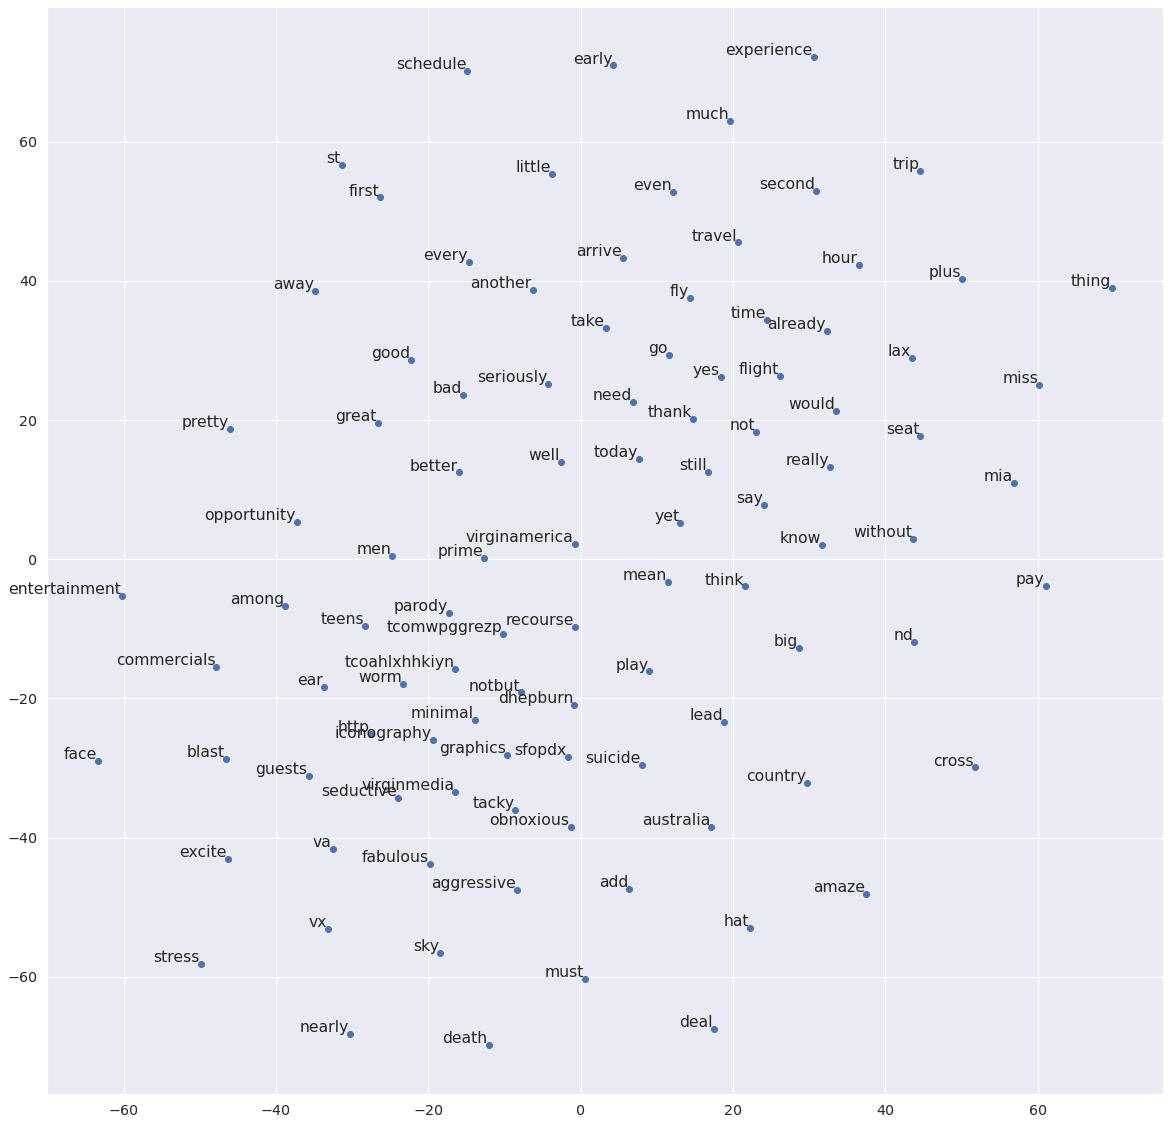

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
X = w2v[w2v.wv.vocab]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X[0:100])
plt.rcParams["figure.figsize"] = (20,20)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
labels = list(w2v.wv.vocab.keys())
for label, x, y in zip(labels, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-1, -1),
        textcoords='offset points', ha='right', va='bottom')

plt.show()

In [45]:
# Replace every word by a token
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


t = Tokenizer()
t.fit_on_texts(clean_text)
vocab_size = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(clean_text)
padded_docs = pad_sequences(encoded_docs, maxlen=20, padding='post')
embedding_dict = dict()
for i in w2v.wv.vocab:
    embedding_dict[i] = w2v[i]

embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


## ML Model Random Forest Classifier with CountVectorizer

In [46]:
## Random Forest with CountVectorizer

In [47]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(df['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [48]:
labels = df['airline_sentiment']
# labels = labels.astype('int')

In [49]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [50]:
# Using Random Forest to build model and calc. CV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7111338797814207


In [51]:
#Predict and print result
result = forest.predict(X_test)
print(result)

['positive' 'negative' 'negative' ... 'negative' 'negative' 'negative']


[[2487  239   88]
 [ 368  442   74]
 [ 185  123  386]]


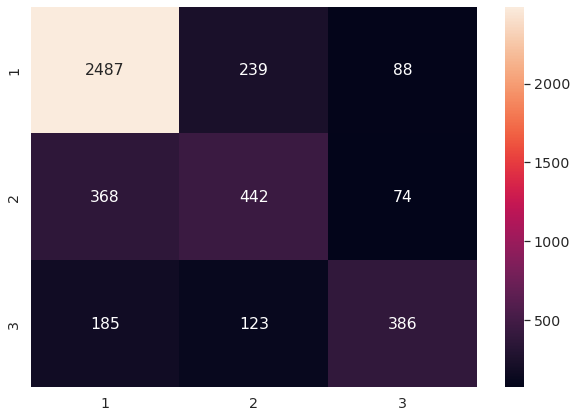

In [54]:
# Plot conf. matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

c = confusion_matrix(y_test, result)

print(c)
df_cm = pd.DataFrame(c, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')


## Observations
- 71% accuracy. -ve predications are accurate
- (Key 1 = -ve, 2 = neutral, 3 = +ve)

## ML Model - Random Forest with TfidfVectorizer


In [55]:
# Using TfidfVectoriz
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(df['text'])
data_features = data_features.toarray()
data_features.shape

(14640, 1000)

In [56]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [57]:
# Using Random Forest to build model and calculate CV score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7084016393442624


In [58]:
result = forest.predict(X_test)

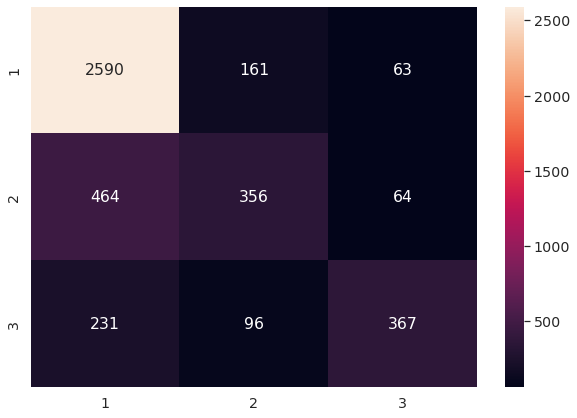

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

## Observations
- (Key 1 = -ve, 2 = neutral, 3 = +ve)
- 71% accuracy, sames as previous model i.e RF with CountVectorizer

## More Pre-processing to get data prepped for LR - remove stop words, change sentiment to numbers etc

In [64]:
from nltk.corpus import stopwords

def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    #some words might give us something important for the sentiment analysis like not, so we keep them
    wl = ["not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in wl) and len(word) > 1] 
    return " ".join(clean_words)

def remove_mentions(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'@\w+', '', input_text[i])
    return input_text

def lower_case(input_text):
    for i in range(len(input_text)):
        input_text[i] = input_text[i].lower()
    return input_text

def remove_http(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'http\S+', '',input_text[i])
    return input_text

def remove_punctuation(input_text):
    for i in range(len(input_text)):
        input_text[i] = re.sub(r'[^\w\s]','',input_text[i])
    return input_text



# Map sentiment to numbers - a bit messy code - got it from stakoverflow
data_2 = df[['text', 'airline_sentiment']]
preprocessed_data = data_2.apply(remove_mentions).apply(remove_http).apply(remove_punctuation).apply(lower_case)
clean_text = []
for tweet in preprocessed_data.text:
    clean = remove_stopwords(tweet)
    clean_text.append(clean)

X = clean_text
Y = preprocessed_data['airline_sentiment']
from sklearn.model_selection import train_test_split
Y = Y.map({'negative':0, 'positive':1, 'neutral':2}).astype(int)
X_train,X_test,y_train,y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


# Perform word representation - using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_features_train = vectorizer.fit_transform(X_train)
text_features_test = vectorizer.transform(X_test)


# Use word2sec from google - for fun... just to see 
from gensim.models import Word2Vec
sentences = [line.split() for line in clean_text]
w2v = Word2Vec(sentences, size=50, min_count = 0, window = 5,workers=4,iter=500)


# Replace every word by a token
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


t = Tokenizer()
t.fit_on_texts(clean_text)
vocab_size = len(t.word_index) + 1
encoded_docs = t.texts_to_sequences(clean_text)
padded_docs = pad_sequences(encoded_docs, maxlen=20, padding='post')
embedding_dict = dict()
for i in w2v.wv.vocab:
    embedding_dict[i] = w2v[i]

embedding_matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


# Other Machine Learning Techniques with TfidfVectorizer
As I need > 75% accuracy, let me me try other ML techniques


In [68]:
def logistic_regression(training_features, labels_train, test_features, labels_test):
    for c in [0.01, 0.05, 0.25, 0.5, 1, 5]:
    #changing the parameter C to get the optimal classification
        lr = LogisticRegression(C=c)
        lr.fit(training_features, labels_train)
        print ("Accuracy of logistic regression for C=%s: %s" 
           % (c, accuracy_score(labels_test, lr.predict(test_features))))
        results(labels_test, lr.predict(test_features))

In [69]:
def results(labels, pred):
    conf_mat = confusion_matrix(labels,pred)
    df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=True, fmt='g')
    print(conf_mat)
    print(classification_report(labels,pred))  
    print(accuracy_score(labels, pred))

Accuracy of logistic regression for C=0.01: 0.6475409836065574
[[924   0   0]
 [215  23   0]
 [299   2   1]]
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       924
           1       0.92      0.10      0.17       238
           2       1.00      0.00      0.01       302

    accuracy                           0.65      1464
   macro avg       0.85      0.37      0.32      1464
weighted avg       0.76      0.65      0.52      1464

0.6475409836065574
Accuracy of logistic regression for C=0.05: 0.7090163934426229
[[914   4   6]
 [144  80  14]
 [246  12  44]]
              precision    recall  f1-score   support

           0       0.70      0.99      0.82       924
           1       0.83      0.34      0.48       238
           2       0.69      0.15      0.24       302

    accuracy                           0.71      1464
   macro avg       0.74      0.49      0.51      1464
weighted avg       0.72      0.71      0.65      1464

0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of logistic regression for C=1: 0.7971311475409836
[[859  20  45]
 [ 50 153  35]
 [121  26 155]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       924
           1       0.77      0.64      0.70       238
           2       0.66      0.51      0.58       302

    accuracy                           0.80      1464
   macro avg       0.75      0.70      0.72      1464
weighted avg       0.79      0.80      0.79      1464

0.7971311475409836


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy of logistic regression for C=5: 0.7909836065573771
[[836  26  62]
 [ 38 167  33]
 [114  33 155]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       924
           1       0.74      0.70      0.72       238
           2       0.62      0.51      0.56       302

    accuracy                           0.79      1464
   macro avg       0.74      0.71      0.72      1464
weighted avg       0.78      0.79      0.78      1464

0.7909836065573771


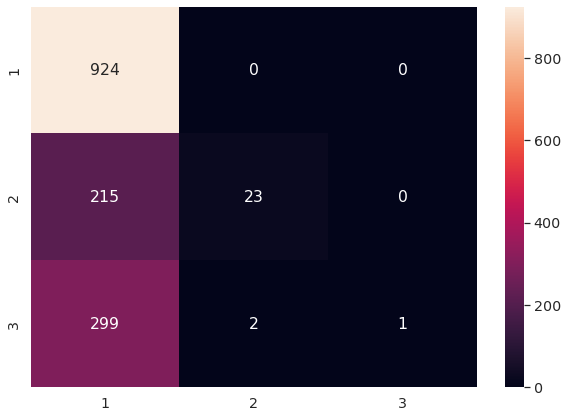

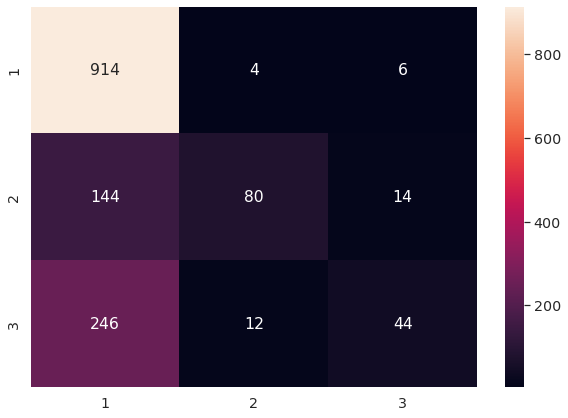

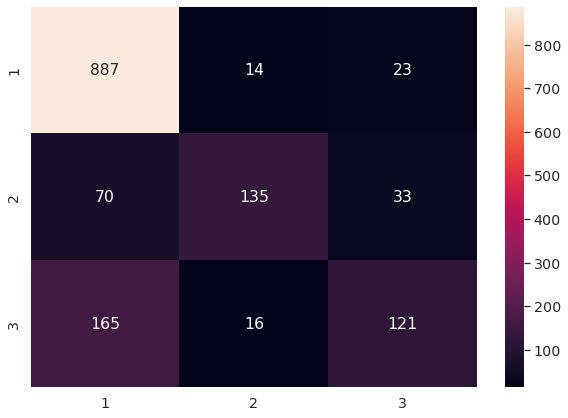

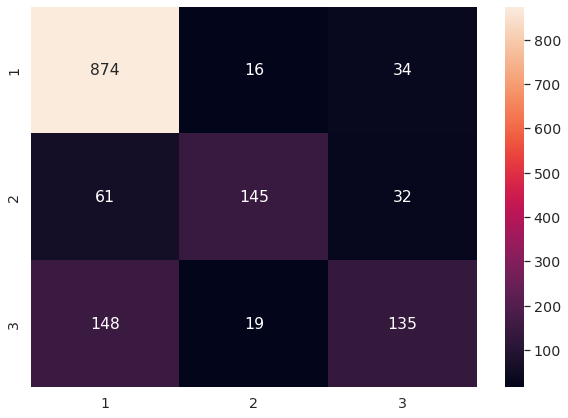

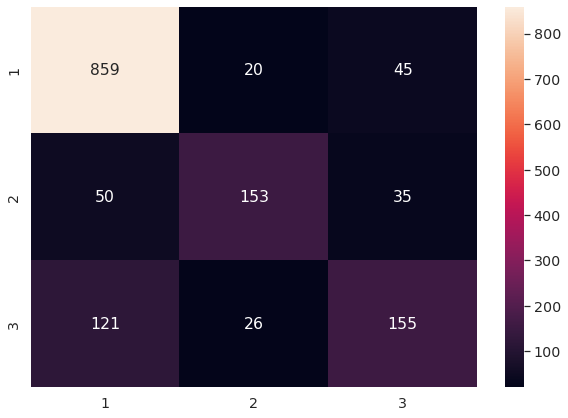

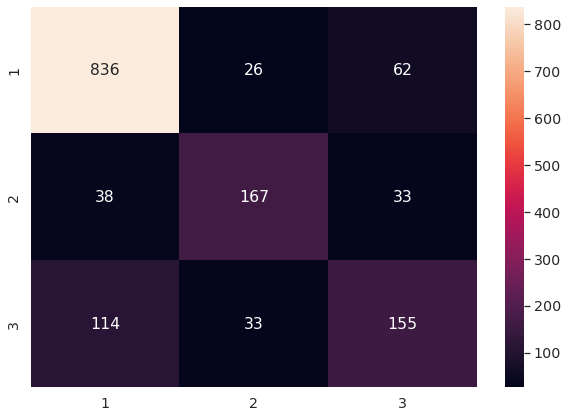

In [70]:
logistic_regression(text_features_train,y_train, text_features_test,y_test)

# Observations
- with LR we get accuracy of 78% with C = 5 - this is really good and mathches what we are looking for

# Summary and conclusions

- 3 ML models were used
- The training data is 13.1k while the testing data 1.4k.
- The ML techniques implemented were; Logistic regression, and Random Forest.


## Tf-IDF was utilized as a word representation 

| Technique  | Accuracy | Precision | Recall | F1Score|
| ---------- | -------- |-------- |-------- |-------- |
| Random Forest with CountVectorizer| 0.71%  |  | -- | -- |
| Random Forest with TfidfVectorizer| 0.71%  | -- | -- | -- |
| Logistic Regression  | 0.79 | 0.79 | 0.80 | 0.79|


## Confusion matrix insights 


Random Forest with CountVectorizer

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 2495 | 243 | 76 |
| positive  | 342 | 458 | 84 |
| neutral  | 186 | 122 | 386 |

Random Forest with TfidfVectorizer

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 864 | 18 | 57 |
| positive  | 436 | 392 | 56|
| neutral  | 224 | 122 | 348 |

Logistic regression

| | negative | positive | neutral|
| ---------- | -------- |-------- |--------|
| negative | 914 | 4 | 6 |
| positive  | 144 | 80 | 14 |
| neutral  | 246 | 12 | 44 |



- LR seems to be the best model here

## Error analysis

- Accuracy of all techniques are better at classifying -ve reviews (probably due to the fact that training data has more -ve reviews - skewing the learning process algos)
